<a href="https://colab.research.google.com/github/Mithra27/supplychainoptimization/blob/main/scmoptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your dataset file:


Saving supply_chain_data.csv to supply_chain_data (2).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier 

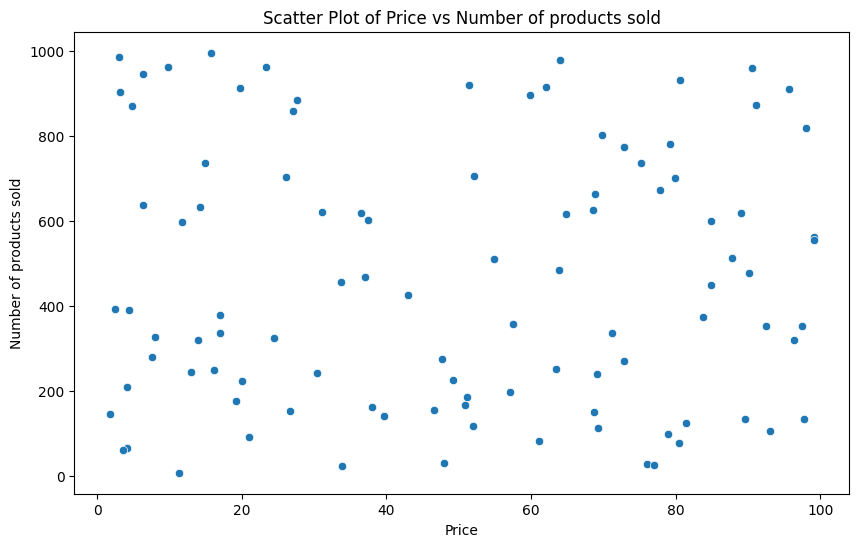

Mean Absolute Error: 327.1175


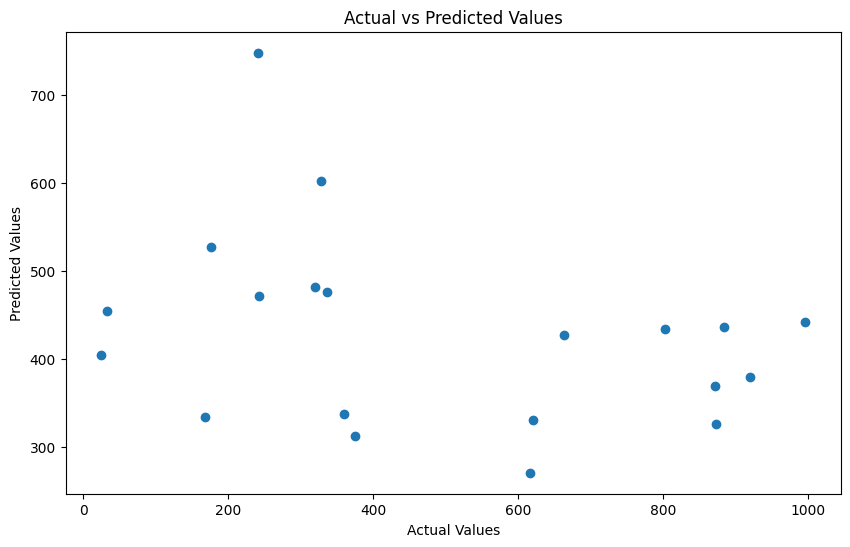

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function to read the dataset
def read_dataset(file_path):
    return pd.read_csv(file_path)

# Function to get data from the user through file upload
def get_data():
    print("Upload your dataset file:")
    uploaded_files = files.upload()

    # Assuming you are uploading a single file, you can get the first file
    file_name = list(uploaded_files.keys())[0]

    return BytesIO(uploaded_files[file_name])

# Function to perform basic data analysis
def analyze_data(df):
    # Display basic information about the dataset
    print("Dataset Info:")
    print(df.info())

    # Display basic statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Display a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Price', y='Number of products sold', data=df)
    plt.title('Scatter Plot of Price vs Number of products sold')
    plt.xlabel('Price')
    plt.ylabel('Number of products sold')
    plt.show()

# Function for predictive analysis
def predictive_analysis(df, target_column):
    # Drop non-numeric columns (you may need to customize this based on your dataset)
    df_numeric = df.select_dtypes(include=['number'])

    # Select features and target variable
    features = df_numeric.drop(target_column, axis=1)
    target = df_numeric[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Create a RandomForestRegressor model
    model = RandomForestRegressor()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate and print Mean Absolute Error
    mae = mean_absolute_error(y_test, predictions)
    print(f"Mean Absolute Error: {mae}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Main function
def main():
    # Get the dataset from the user through file upload
    dataset_content = get_data()

    # Read the dataset
    data = pd.read_csv(dataset_content)

    # Perform data analysis
    analyze_data(data)

    # Predictive analysis (change 'Number of products sold' with your target variable)
    predictive_analysis(data, target_column='Number of products sold')

if __name__ == "__main__":
    main()



